In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from pprint import pprint
import astropy.units as u
from astropy.units import Quantity
from astropy.table import Table, vstack
from gammapy.spectrum import FluxPoints
from numpy import isnan

# Temporarily fixing environment variable for gamma-cat
import os
os.environ['GAMMA_CAT'] = os.path.join('C:/Users/Arjun/github/gamma-cat')

## The source

HESS J1804-216

3FGL J1803.1-2147

In [2]:
# Preparing Fermi data
from gammapy.catalog import SourceCatalog3FGL

cat_f = SourceCatalog3FGL()
source_f = cat_f['3FGL J1803.1-2147']

data_f = source_f.flux_points.table

data_f['e_ref'] = data_f['e_ref'].to('TeV')
data_f['e_min'] = data_f['e_min'].to('TeV')
data_f['e_max'] = data_f['e_max'].to('TeV')

dnde_err_f = data_f['dnde'] * (data_f['flux_errn'] / data_f['flux'])
data_f['dnde_err'] = dnde_err_f.to(data_f['dnde'].unit)

data_f

e_ref,e_min,e_max,flux,flux_errn,flux_errp,eflux,eflux_errn,eflux_errp,is_ul,flux_ul,eflux_ul,dnde,dnde_err
TeV,TeV,TeV,1 / (cm2 s),1 / (cm2 s),1 / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),,1 / (cm2 s),erg / (cm2 s),1 / (cm2 s TeV),1 / (cm2 s TeV)
float64,float64,float64,float32,float32,float32,float32,float32,float32,bool,float64,float64,float64,float64
0.000173205080757,0.0001,0.0003,nan,nan,nan,nan,nan,nan,True,3.98796125012e-08,1.00778135836e-11,2.12325255696e-08,nan
0.000547722557505,0.0003,0.001,2.9801e-08,4.94884e-09,5.03657e-09,2.14567e-11,3.56315e-12,3.62631e-12,False,nan,nan,4.46406285904e-05,7.41314920056e-06
0.00173205080757,0.001,0.003,9.79825e-09,7.89474e-10,7.89474e-10,2.36888e-11,1.90868e-12,1.90868e-12,False,nan,nan,4.92846493564e-06,3.97101021728e-07
0.00547722557505,0.003,0.01,3.06468e-09,2.36269e-10,2.36269e-10,1.88113e-11,1.45024e-12,1.45024e-12,False,nan,nan,3.913687025e-07,3.01722880323e-08
0.0316227766017,0.01,0.1,1.67365e-10,5.03076e-11,5.67643e-11,1.55068e-12,4.66113e-13,5.25936e-13,False,nan,nan,9.67858062932e-10,2.90924598209e-10


In [3]:
# Preparing gamma-cat data
from gammapy.catalog import SourceCatalogGammaCat

cat_g = SourceCatalogGammaCat()
source_g = cat_g['HESS J1804-216']

data_g = source_g.flux_points.table
dnde_err_g = data_g['dnde'] * (data_g['dnde_errn'] / data_g['dnde'])
data_g['dnde_err'] = dnde_err_g.to(data_g['dnde'].unit)

data_g

e_ref,dnde,dnde_errp,dnde_errn,dnde_ul,dnde_err
TeV,1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV)
float32,float32,float32,float32,float32,float32
0.19021,3.16659e-10,1.68438e-10,1.66872e-10,nan,1.66872e-10
0.246156,2.62701e-10,3.58672e-11,3.55612e-11,nan,3.55612e-11
0.326564,1.09507e-10,1.56187e-11,1.54475e-11,nan,1.54475e-11
0.429598,6.12512e-11,7.68776e-12,7.57996e-12,nan,7.57996e-12
0.578169,2.66731e-11,3.71834e-12,3.65101e-12,nan,3.65101e-12
0.76265,1.45516e-11,2.1218e-12,2.07485e-12,nan,2.07485e-12
1.0253,4.73271e-12,1.02593e-12,9.9894e-13,nan,9.9894e-13
1.40586,2.45476e-12,6.74752e-13,6.56555e-13,nan,6.56555e-13


In [4]:
# Combining data
colnames=['e_ref', 'dnde', 'dnde_err']

data_combined = vstack([
                    data_f[colnames], 
                    data_g[colnames]
                    ])

flux_points = FluxPoints(data_combined)

flux_points.table

mask = ~np.isnan(flux_points.table['dnde_err'])
flux_points.table = flux_points.table[mask]

flux_points.table

e_ref,dnde,dnde_err
TeV,1 / (cm2 s TeV),1 / (cm2 s TeV)
float64,float64,float64
0.000547722557505,4.46406285904e-05,7.41314920056e-06
0.00173205080757,4.92846493564e-06,3.97101021728e-07
0.00547722557505,3.913687025e-07,3.01722880323e-08
0.0316227766017,9.67858062932e-10,2.90924598209e-10
0.190209999681,3.16659004573e-10,1.6687198845e-10
0.246156007051,2.62700999842e-10,3.55611998182e-11
0.326564013958,1.0950700069e-10,1.54474991826e-11
0.429598003626,6.12511985576e-11,7.57996009709e-12


<Container object of 3 artists>

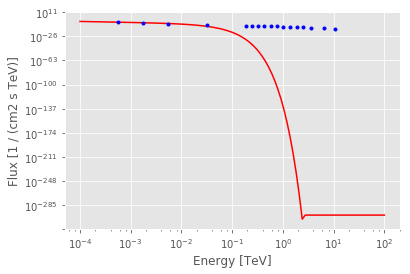

In [5]:
# Defining units
energy_range = [1e-4, 100] * u.TeV
opts = dict(energy_unit='TeV', flux_unit='cm-2 s-1 TeV-1', energy_range=energy_range)

source_f.spectral_model.plot(**opts, color='r')
# Using the combined energy range to stretch to gamma-cat data

p_f = source_f.spectral_model.parameters
p_g = source_g.spectral_model.parameters
# plt.plot(p_f['reference'].value / 1e6, p_f['amplitude'].value * 1e6, '*', color='c')
# plt.plot(p_g['reference'].value, p_g['amplitude'].value, '*', color='c')



# Combined 3FGL + gamma-cat:
# TODO: Split the colors for the flux points (first 5 purple, last 6 red)
# Instead of the below code, I can call plt.errorbar() for each catalog individually. 

plt.errorbar(x=flux_points.table['e_ref'],
             y=flux_points.table['dnde'],
             yerr=flux_points.table['dnde_err'],
             fmt='.',
             color='b'
            )

In [6]:
from gammapy.spectrum.models import PowerLaw

class MyChi2:

    def __init__(self, flux_points, spectral_model):
        self.flux_points = flux_points
        self.spectral_model = spectral_model
    
    def __call__(self, amplitude, index):

        t = self.flux_points.table
        
        dnde_model = PowerLaw.evaluate( # Should be calling: spectral_model.evaluate()
            energy=t['e_ref'],
            amplitude=amplitude,
            index=index,
            reference=1 # 1 TeV
        )

        chi = (t['dnde'] - dnde_model) / t['dnde_err']
        return np.sum(chi ** 2)

In [7]:
from iminuit import Minuit

class Chi2Fitter(object):
    def __init__(self, flux_points, spectral_model):
        self.flux_points = flux_points
        self.spectral_model = spectral_model
        self.minuit = None
    
    def fit(self):

        chi2 = MyChi2(self.flux_points, self.spectral_model)
        
        pars = dict(
            amplitude=self.spectral_model.parameters['amplitude'].value,
            index = self.spectral_model.parameters['index'].value
        )
        
        minuit = Minuit(chi2, **pars)
        
        minuit.migrad()
        minuit.hesse()
        
        self.minuit = minuit

In [8]:
spectral_model = PowerLaw(
    reference=1,
    amplitude=1e-12, # p_g['amplitude'].value 
    index=1.0 # p_g['index'].value
)

fitter = Chi2Fitter(flux_points=flux_points, spectral_model=spectral_model)
fitter.fit()

print(fitter.minuit.values)
print('\n', fitter.minuit.errors)


        
fitter.flux_points.table.pprint()

C:\Users\Arjun\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: InitialParamWarning: errordef is not given. Default to 1.
C:\Users\Arjun\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: InitialParamWarning: Parameter amplitude is floating but does not have initial step size. Assume 1.
C:\Users\Arjun\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: InitialParamWarning: Parameter index is floating but does not have initial step size. Assume 1.
C:\Users\Arjun\Anaconda3\lib\site-packages\gammapy\spectrum\models.py:408: RuntimeWarning: overflow encountered in power
  return amplitude * np.power((energy / reference), -index)
C:\Users\Arjun\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in square


FCN = 379.68092110524486 
 TOTAL NCALL = 129 
 NCALLS = 129 
 
 
 EDM = 3.83732722150078e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 False 
 False 
 True 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,amplitude,9.2261e-13,7.91368e-13,0,0,,,
2,index,2.38331,0.167906,0,0,,,


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,amplitude,9.2261e-13,7.91368e-13,0,0,,,
2,index,2.38331,0.167907,0,0,,,


+,amplitude,index
amplitude,1.00,-1.00
index,-1.00,1.00


{'amplitude': 9.226098819006827e-13, 'index': 2.383313689024864}

 {'amplitude': 7.913684898186536e-13, 'index': 0.16790651889468372}
      e_ref              dnde            dnde_err    
       TeV         1 / (cm2 s TeV)   1 / (cm2 s TeV) 
----------------- ----------------- -----------------
0.000547722557505 4.46406285904e-05 7.41314920056e-06
 0.00173205080757 4.92846493564e-06 3.97101021728e-07
 0.00547722557505   3.913687025e-07 3.01722880323e-08
  0.0316227766017 9.67858062932e-10 2.90924598209e-10
   0.190209999681 3.16659004573e-10  1.6687198845e-10
   0.246156007051 2.62700999842e-10 3.55611998182e-11
   0.326564013958  1.0950700069e-10 1.54474991826e-11
   0.429598003626 6.12511985576e-11 7.57996009709e-12
   0.578168988228  2.6673099493e-11 3.65101004984e-12
    0.76265001297 1.45516003761e-11 2.07485005739e-12
    1.02530002594 4.73270988371e-12  9.9893997154e-13
     1.4058599472 2.45475991964e-12 6.56554942791e-13
    1.88432002068  1.4884400136e-12 3.77419991961e-13
  

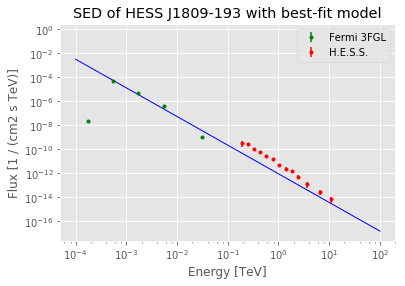

In [9]:
source_g.spectral_model.plot(linestyle='dashed', alpha=0, **opts)
# source_f.spectral_model.plot(linestyle='dashed', alpha=0.7, **opts)

# plt.plot(p_f['reference'].value / 1e6, p_f['amplitude'].value * 1e6, '*', color='g')
# plt.plot(p_g['reference'].value, p_g['amplitude'].value, '*', color='r')

fermi = plt.errorbar(x=data_f['e_ref'],
             y = data_f['dnde'],
             yerr = data_f['dnde_err'],
             fmt='.',
             color='g'
            )

hess = plt.errorbar(x=data_g['e_ref'],
             y = data_g['dnde'],
             yerr = data_g['dnde_err'],
             fmt='.',
             color='r'
            )


from gammapy.utils.energy import Energy
energy = Energy.equal_log_spacing(
    emin=energy_range[0],
    emax=energy_range[1],
    nbins=100,
)

spectral_model = PowerLaw(
    index=fitter.minuit.values['index'],
    amplitude=fitter.minuit.values['amplitude'],
    reference=1
    )

flux = spectral_model(
    energy=energy.to('TeV').value
#     amplitude = fitter.minuit.values['amplitude'],
#     index = fitter.minuit.values['index'],
#     reference=1,
)
plt.plot(energy, flux, linewidth=1, color='blue')

plt.legend([fermi, hess], ['Fermi 3FGL', 'H.E.S.S.'])

plt.title('SED of HESS J1809-193 with best-fit model')

# plt.savefig('test')

In [10]:
print('\nMinimum value of function: ', fitter.minuit.fval)

result = fitter.minuit.fval / (len(flux_points.table) - len(fitter.minuit.args))
print('\nReduced minimum: ', result)


Minimum value of function:  379.68092110524486

Reduced minimum:  25.312061407016323


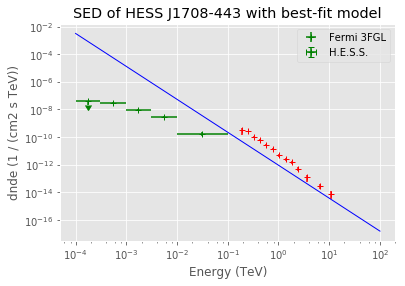

In [15]:
# flux_points.plot(color='g')

source_f.flux_points.plot(c='g')
source_g.flux_points.plot(c='r')



plt.legend(['Fermi 3FGL', 'H.E.S.S.'])

plt.title('SED of HESS J1708-443 with best-fit model')

plt.plot(energy, flux, linewidth=1, color='blue')

# plt.savefig('HESS J1708-443 Combined.png')